In [1]:
import torch
import numpy as np
import sys
sys.path.append('..')
# load the model of "abd implementation"

In [2]:
# load rdfcil implementation's class norm
import pandas as pd

ours_class_norm = pd.read_csv('/home/minsoo/workspace/AlwaysBeDreaming-DFCIL/yujin/ImageNet-100/version_508_imnet_5task_54.64/4_task_class_norm.csv', header=None)
# csv to np array
ours_class_norm = ours_class_norm.to_numpy().reshape(-1)

rdfcil_class_norm = pd.read_csv('/home/minsoo/workspace/AlwaysBeDreaming-DFCIL/yujin/ImageNet-100/imnet100_version_675_rdfcil_5task_49.44/4_task_class_norm.csv', header=None)
# csv to np array
rdfcil_class_norm = rdfcil_class_norm.to_numpy().reshape(-1)

# shape of class norm
print('ours_class_norm.shape', ours_class_norm.shape)
print('rdfcil_class_norm.shape', rdfcil_class_norm.shape)

ours_class_norm.shape (100,)
rdfcil_class_norm.shape (100,)


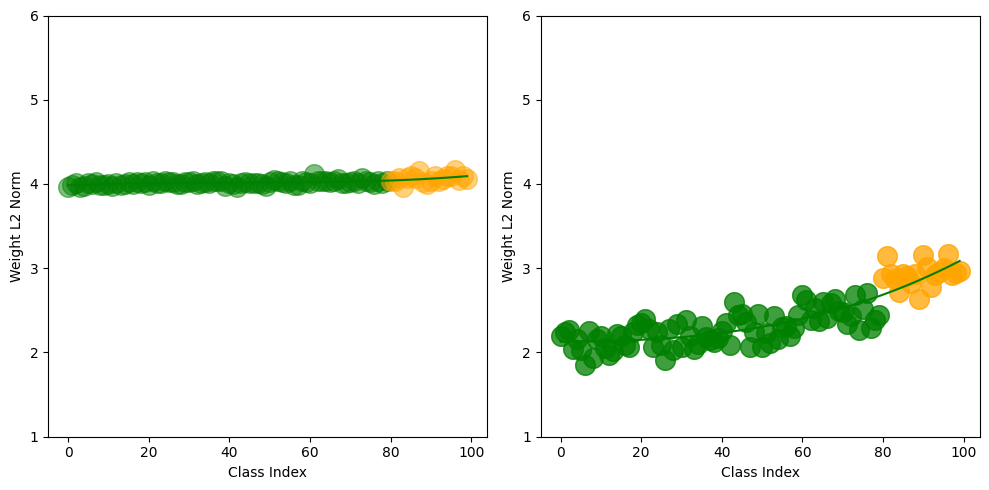

In [3]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
class_idx = np.arange(100)
# Scatter plot for our_class_norm
ax[0].scatter(class_idx[:80], ours_class_norm[:80], label='Our Class Norm (0-79)', color='green', alpha=0.5, s=200)
ax[0].scatter(class_idx[80:], ours_class_norm[80:], label='Our Class Norm (80-99)', color='orange', alpha=0.5, s=200)

# Scatter plot for rdfcil_class_norm
ax[1].scatter(class_idx[:80], rdfcil_class_norm[:80], label='RDFCIL Class Norm (0-79)', color='green', alpha=0.5, s=200)
ax[1].scatter(class_idx[80:], rdfcil_class_norm[80:], label='RDFCIL Class Norm (80-99)', color='orange', alpha=0.5, s=200)



# Fit a polynomial regression line
trendline = np.polyfit(class_idx, ours_class_norm, deg=3)
ax[0].plot(class_idx, np.polyval(trendline, class_idx), color='green', label='Trendline')
trendline = np.polyfit(class_idx, rdfcil_class_norm, deg=3)
ax[1].plot(class_idx, np.polyval(trendline, class_idx), color='green', label='Trendline')

# Plot the scatter plot with trendline
ax[1].scatter(class_idx[:80], rdfcil_class_norm[:80], label='RDFCIL Class Norm (0-79)', color='green', alpha=0.5, s=200)
ax[1].scatter(class_idx[80:], rdfcil_class_norm[80:], label='RDFCIL Class Norm (80-99)', color='orange', alpha=0.5, s=200)
# Set labels and legends
ax[0].set_xlabel('Class Index')
ax[0].set_ylabel('Weight L2 Norm')
ax[0].legend().set_visible(False)
ax[0].set_ylim(1,6)
ax[1].set_xlabel('Class Index')
ax[1].set_ylabel('Weight L2 Norm')
ax[1].legend().set_visible(False)
ax[1].set_ylim(1,6)

# Show the plot
plt.tight_layout()
plt.show()


In [4]:
# abd and deepinv weight norm
# load the model of "abd implementation"
import torch

from models.resnet import resnet18
model = resnet18(100)

abd_path= '/home/minsoo/workspace/AlwaysBeDreaming-DFCIL/yujin/ImageNet-100/resnet18_DFCIL-fivetask/ImageNet-100/abd/models/repeat-1/task-5/class.pth'
model.load_state_dict(torch.load(abd_path))

abd_weight_norm=torch.cat([model.last.weight.data, model.last.bias.data.view(-1, 1)], dim=1).norm(dim=1)

# print(model.named_modules())

deepinv_path='/home/minsoo/workspace/AlwaysBeDreaming-DFCIL/yujin/ImageNet-100/resnet18_DFCIL-fivetask/ImageNet-100/deepinv/models/repeat-1/task-5/class.pth'
model.load_state_dict(torch.load(deepinv_path))

deepinv_weight_norm=torch.cat([model.last.weight.data, model.last.bias.data.view(-1, 1)], dim=1).norm(dim=1)

lwf_path='/home/minsoo/workspace/AlwaysBeDreaming-DFCIL/yujin/ImageNet-100/resnet18_DFCIL-fivetask/ImageNet-100/lwf/models/repeat-1/task-5/class.pth'
model.load_state_dict(torch.load(lwf_path))

lwf_weight_norm=torch.cat([model.last.weight.data, model.last.bias.data.view(-1, 1)], dim=1).norm(dim=1)


torch.Size([100])
torch.Size([100])
torch.Size([100])
(100,)
(100,)


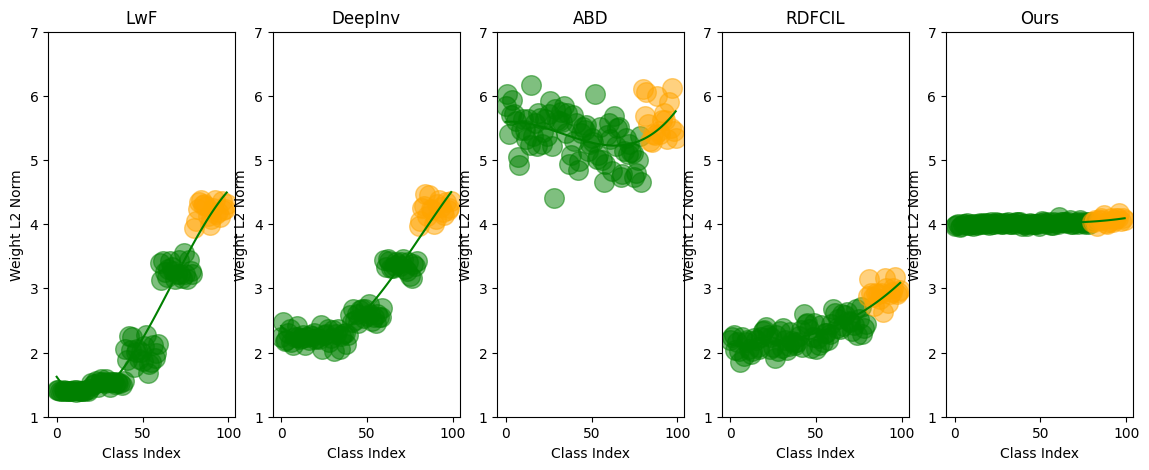

In [9]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, ax = plt.subplots(1, 5, figsize=(14, 5))
class_idx = np.arange(100)

weight_norms = [lwf_weight_norm,deepinv_weight_norm, abd_weight_norm, rdfcil_class_norm, ours_class_norm]
names=['LwF','DeepInv', 'ABD', 'RDFCIL', 'Ours']
# Scatter plot for all the class norms
for i, weight_norm in enumerate(weight_norms):
    print(weight_norm.shape)
    ax[i].scatter(class_idx[:80], weight_norm[:80], label='Class Norm (0-79)', color='green', alpha=0.5, s=200)
    ax[i].scatter(class_idx[80:], weight_norm[80:], label='Class Norm (80-99)', color='orange', alpha=0.5, s=200)
    trendline = np.polyfit(class_idx, weight_norm, deg=3)
    ax[i].plot(class_idx, np.polyval(trendline, class_idx), color='green', label='Trendline')
    ax[i].set_xlabel('Class Index')
    ax[i].set_ylabel('Weight L2 Norm')
    ax[i].legend().set_visible(False)
    ax[i].set_ylim(1,7)
    ax[i].set_title(names[i])

